In [19]:
from algoneer_datasets.bike_sharing import load_dataset
ds = load_dataset()
df = ds.df

In [20]:
from algoneer_datasets.bike_sharing.algorithms import get_algorithm

In [21]:
# we initialize a random forest regressor
algo = get_algorithm('random-forest', n_estimators=100)

In [22]:
model = algo.fit(ds)

In [23]:
# we make sure this model is a regressor
model.algorithm.is_regressor

True

## Partial Dependence Plot

To make a partial dependence plot for a given feature, we implement the following algorithm:

* If the feature is categorical, we generate a list of all possible feature values.
* If the features is numerical, we generate a list of values spanning the valid range of the feature
* For each value from the list of values, we calculate the average prediction value (for regression) or the class frequencies (for classification) over all datapoints in the dataset.
* We plot the resulting value as a function of the feature value.

In [24]:
from algoneer.methods.blackbox.pdp import PDP

pdp = PDP()

In [25]:
result = pdp.run(model, ds, max_values=20, max_datapoints=100)

[PDP]: unknown attribute type for column 'instant', skipping...
[PDP]: unknown attribute type for column 'yr', skipping...
[PDP]: unknown attribute type for column 'mnth', skipping...
[PDP]: unknown attribute type for column 'holiday', skipping...
[PDP]: unknown attribute type for column 'weekday', skipping...
[PDP]: unknown attribute type for column 'workingday', skipping...


Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')


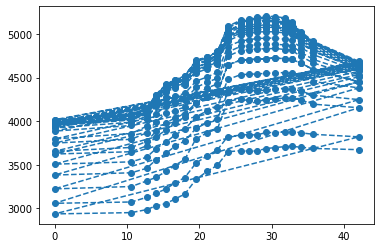

In [27]:
%matplotlib inline
import matplotlib.pylab as pl

d = 'atemp'
c = 'hum'

print(ds.columns)

# we plot the influence of the temperature on the bike rentals for different levels of humidity
pl.plot([x[1]*50 for x in result[c][d]], [x[2] for x in result[c][d]], marker='o', ls='--')